# Decision Tree

# 1. Theoretical Considerations

# 1.1 The Decision Tree Algorithm

The decision tree algorithm is a popular and widely used machine learning algorithm for both classification and regression tasks.  Decision trees are important in machine learning due to their interpretability, versatility, and ability to handle non-linear relationships in data. They provide a clear representation of decision-making processes, making them valuable for explaining predictions. 

Decision trees work by recursively partitioning the feature space based on the values of features, selecting splits that optimize certain criteria (e.g., Gini impurity for classification, variance reduction for regression). This process continues until a stopping criterion is met, such as reaching a maximum depth or when further splits do not significantly improve model performance. 

The decision tree algorithm is easy to understand and interpret, making it useful for both explanatory data analysis and predictive modeling. Additionally, decision trees are capable of handling numerical and categorical data, even missing data as well.

Decision trees are robust to outliers and missing values, and they naturally provide insights into feature importance. Overall, decision trees offer an intuitive and powerful approach for both classification and regression tasks in various domains. However, it can be impeded my overfitting if the tree is too deep or the stopping criterion is not defined.


# 1.2 Advantages of Decision Tree

One significant advantage of decision trees is their ability to handle both numerical and categorical variables, a feature lacking in many other modeling methods, which often specialize in just one type of variable.

Validation of decision tree models can be accomplished through statistical tests, allowing for easy establishment of reliability.

Being a white box model, the decision tree's logic is transparent and readily interpretable, unlike black-box models such as artificial neural networks. This transparency facilitates clearer understanding of the results.

# 2. Import necessary Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve, auc

# 3. Display and Demonstrate Content of Dataset

In [2]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,33,0,0,0,1,1,...,1,0,2,15,0,1,1,7,6,9
1,0,0,1,1,27,1,0,0,1,0,...,1,0,2,1,2,0,1,7,6,6
2,0,0,1,1,26,1,0,0,0,0,...,1,0,3,0,30,0,1,13,4,3
3,0,0,0,1,19,1,0,0,1,1,...,1,0,3,0,0,0,0,11,5,7
4,0,1,0,1,37,0,0,0,1,1,...,1,0,2,0,0,0,0,5,5,3


# 4. Prepare Dataset

# 4.1 Choose Variables

Based on the explanatory data analysis, we have the chose independent variables (feature variables):

HighBP, HighChol, Smoker, HeartDiseaseorAttack, PhysActivity, GenHLTH, DiffWalk, Age, Income, BMI and PhysHlth

And the dependent variable is DIABETE4.

In [3]:
diabetes_dataset = pd.DataFrame(diabetes[['Diabetes_binary','HighBP','HighChol','Smoker','HeartDiseaseorAttack','PhysActivity','GenHlth','DiffWalk','Age','Income','BMI','PhysHlth']])
diabetes_dataset.head()

,Diabetes_binary,HighBP,HighChol,Smoker,HeartDiseaseorAttack,PhysActivity,GenHlth,DiffWalk,Age,Income,BMI,PhysHlth
0,0,1,0,0,0,1,2,1,7,9,33,0
1,0,0,1,1,0,1,2,0,7,6,27,2
2,0,0,1,1,0,0,3,0,13,3,26,30
3,0,0,0,1,0,1,3,0,11,7,19,0
4,0,1,0,0,0,1,2,0,5,3,37,0


All variables present, categorical or not, have all been presented as numerical data and no further decoding, cleaning or adjustment is needed.

# 4.2 Fitting in Decision Tree Model

The dataset, with all values decoded, can be fitted into a Decision Tree Model, with 67,136 non-null values.

In [4]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67136 entries, 0 to 67135
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       67136 non-null  int64
 1   HighBP                67136 non-null  int64
 2   HighChol              67136 non-null  int64
 3   Smoker                67136 non-null  int64
 4   HeartDiseaseorAttack  67136 non-null  int64
 5   PhysActivity          67136 non-null  int64
 6   GenHlth               67136 non-null  int64
 7   DiffWalk              67136 non-null  int64
 8   Age                   67136 non-null  int64
 9   Income                67136 non-null  int64
 10  BMI                   67136 non-null  int64
 11  PhysHlth              67136 non-null  int64
dtypes: int64(12)
memory usage: 6.1 MB


# 5. Decision Tree Model

## 5.1 Seperate feature variables and target variable

In this step, feature variables are merged into X, and the target variable remains as _DIABETE4 and is represented by y.

In [5]:
featured_cols = ['HighBP','HighChol','Smoker','HeartDiseaseorAttack','PhysActivity','GenHlth','DiffWalk','Age','Income','BMI','PhysHlth']
dependent = ['Diabetes_binary']
x = diabetes_dataset[featured_cols]
y = diabetes_dataset[dependent]

## 5.2 Split to Train and Test set

We are going to split the X and Y dataset randomly into the Train and Test datasets with a ratio of 75% to 25% respectively, producing y_train, y_test, X_train and X_test. This helps us test the model performance and to determine its accuracy.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

## 5.3 Using Scikit-learn to Develop a Decision Tree Model 

For classification purposes, we've imported the DecisionTreeClassifier() module from sklearn. This specialized classifier can effectively categorize both binary and multiclass variables.

The subsequent code initiates the fitting process of the decision tree classifier clf to the training datasets: x_train and y_train. This entails training the decision tree to generate predictions based on the feature values within x_train and their corresponding target values in y_train.

Following the training phase, we leverage the trained decision tree classifier clf to forecast the target values for the test data x_test. The resultant predictions are then stored in the variable y_pred.

In [7]:
clf = DecisionTreeClassifier(random_state = 0) 
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

## 5.4 Evaluating Accuracy

With the predicted data y_pred based on the features in x_test, which was derived from the decision tree model, we can determine the accuracy of the model by comparing predicted target a y_pred with true target values y_test.

### 5.4 (a) ROC and Area Under Curve (AUC)

 The ROC curve is a graphical representation that contrasts the true positive rate (TPR) against the false positive rate (FPR) across various classification thresholds. TPR signifies the proportion of correctly identified positive cases out of the total positives, while FPR denotes the proportion of incorrectly identified positive cases relative to the total negatives.

AUC, or Area Under the Curve, serves as a metric summarizing the classifier's performance based on the ROC curve. It quantifies the aggregate performance of the model across all feasible classification thresholds. AUC serves as a measure of the model's predictive accuracy, ranging from 0 to 1, where 0 suggests a poor classifier and 1 signifies a flawless classifier.

With that in mind, we computed the accuracy

In [8]:
FPR, TPR, thresholds = roc_curve(y_test, y_pred)
test_dataset_AUC = auc(FPR,TPR)
print()
print("Accuracy:",test_dataset_AUC)
print()


Accuracy: 0.6447018865482063



# 5.5 Determining True Positive Rate (TPR) and False Positive Rate (FPR)


Goodness of Fit of Model 	Test Dataset
True Positive Rate		: 0.6188112962306511
False Positive Rate		: 0.32940752313423866
------------------------------------------------------


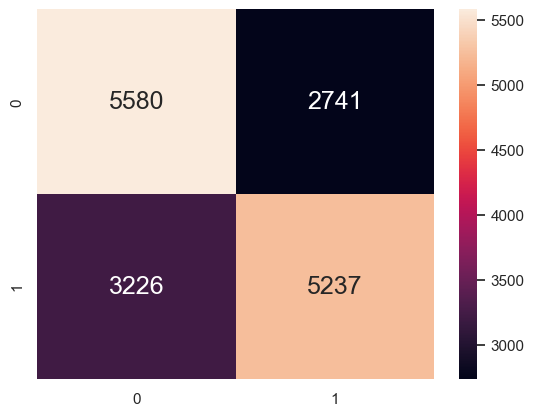

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix for Train and Test
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

#A function to find the True Positive Rate, False Positive Rate

def classification_error(y_true,y_pred):
    C_M = confusion_matrix(y_test, y_pred)
    TN = C_M[0][0]
    FN = C_M[1][0]
    TP = C_M[1][1]
    FP = C_M[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR

[TPR1_test, FPR1_test] = classification_error(y_test, y_pred)

# Print Classification Accuracy, True Positive Rate, False Positive Rate 
# Check the Goodness of Fit 
print()
print("Goodness of Fit of Model \tTest Dataset")
print("True Positive Rate\t\t:", [TPR1_test, FPR1_test][0])
print("False Positive Rate\t\t:", [TPR1_test, FPR1_test][1])
print("------------------------------------------------------")

## 5.6 Optimising Decision Tree Performance 

### 5.6.1 What can be improved

Criterion: (default="gini") This parameter enables the utilization of various attribute selection metrics. The supported criteria include "gini" for the Gini index and "entropy" for information gain.

Max_depth: This parameter represents the maximum depth of a tree. When left unspecified, nodes are expanded until all leaves contain fewer than the minimum number of samples required to split. A higher maximum depth value can lead to overfitting. Hence, it's essential to determine the optimal max_depth for the model to enhance prediction accuracy while mitigating overfitting.

### 5.6.2 How to determine Max_depth

We will increment the values of Max_depth in the Decision Tree model until reaching the peak of the ROC curve, which indicates the largest area underneath it. This approach assists in pinpointing the highest Accuracy while determining the optimal Max_depth, striking a balance between false positive rate and true positive rate.

The subsequent code iteration experimented with Max_depth values ranging from 1 to 9. Upon analysis, it was observed that the area under the ROC curve remained consistent at 0.81 when Max_depth was equal to or greater than 6. Therefore, Max_depth == 6 emerges as the most suitable choice.

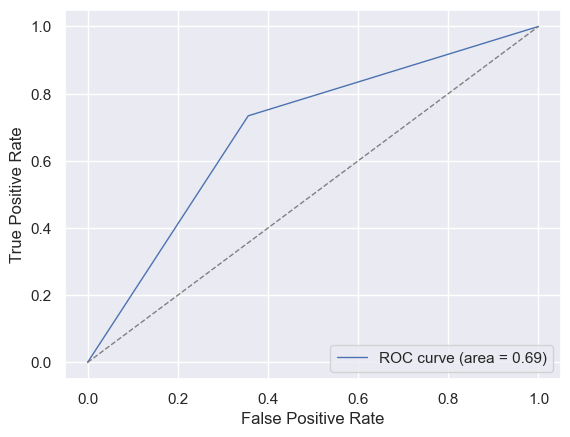

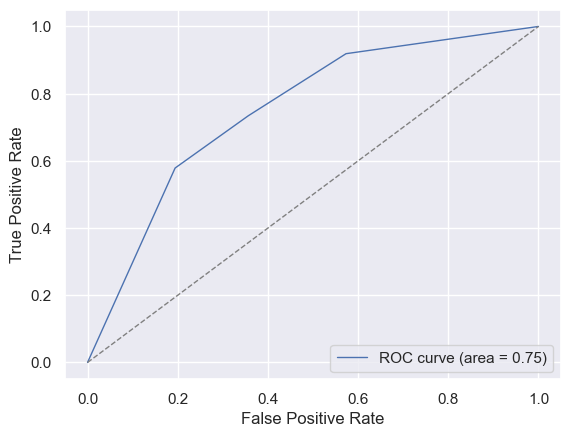

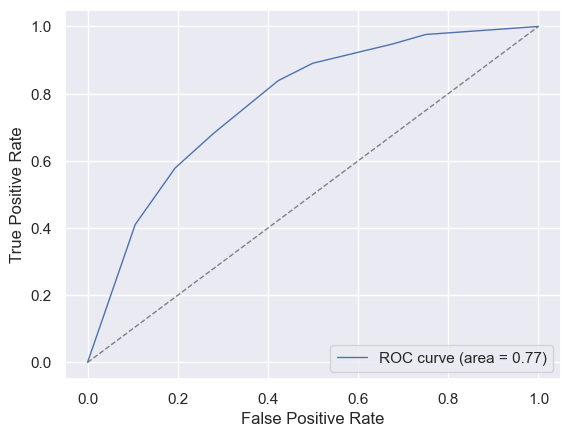

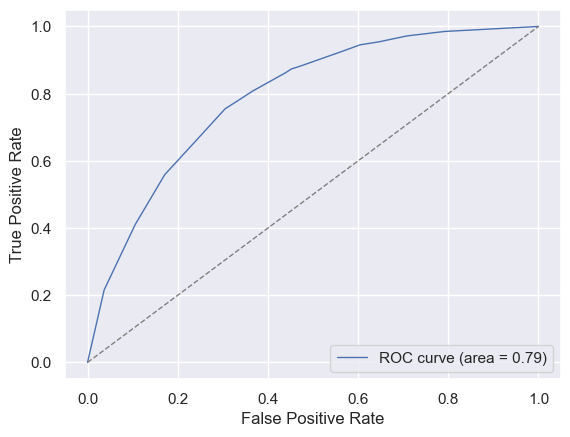

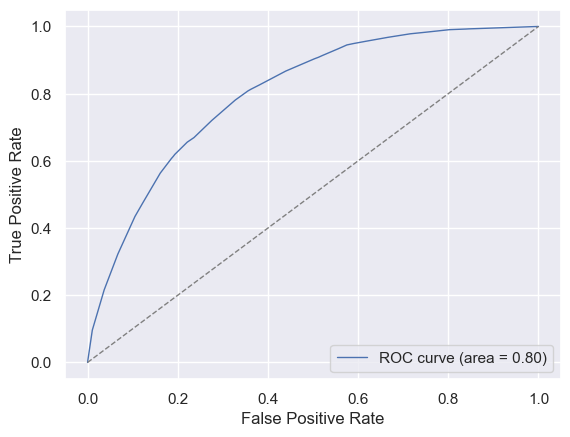

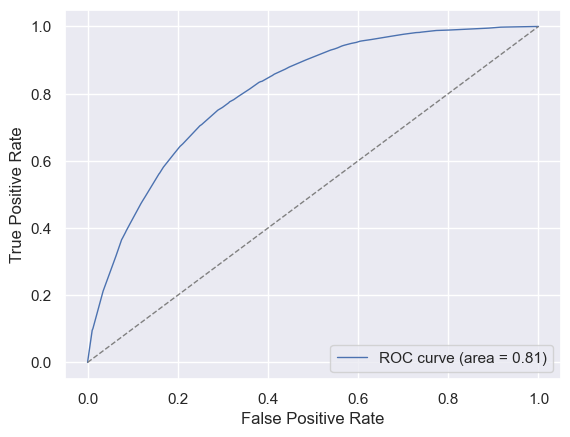

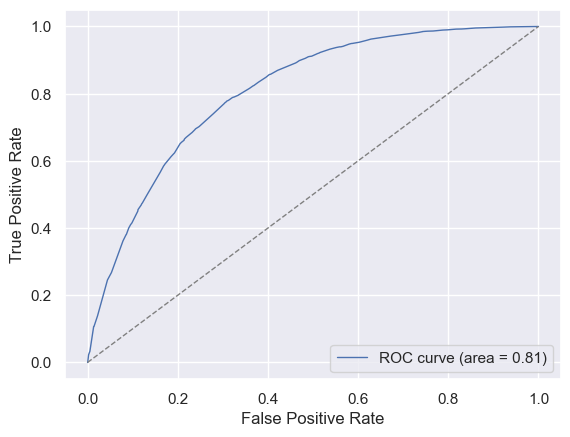

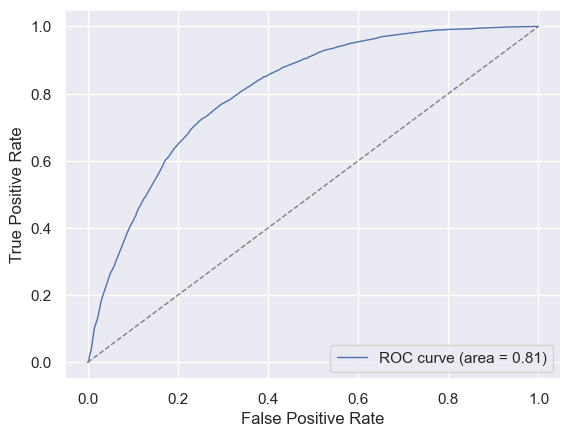

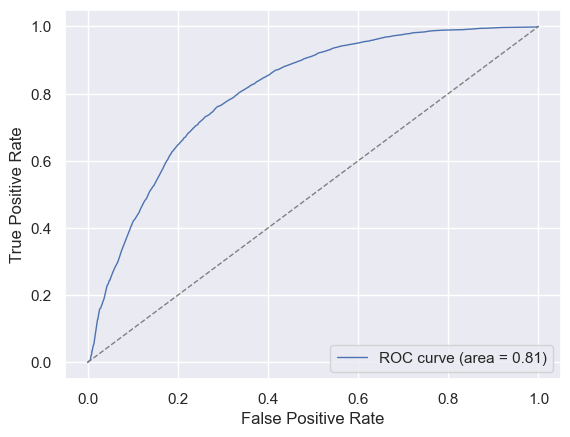

In [10]:
def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color='gray', lw=1)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
from sklearn.tree import DecisionTreeClassifier

max_depths = range(1, 10)

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(x_train, y_train)
    y_pred_prob = clf.predict_proba(x_test)[:, 1]
    plot_roc_curve(y_test, y_pred_prob)

### 5.7.3 The Optimised Model

Now, we introduce our optimized model, featuring an improved criterion and the optimal Max_depth determined earlier.

The outcome demonstrates that the Accuracy of the Optimized Model, along with the TPF/FPR, exhibits notable enhancements compared to the previous iteration. This outcome indicates the successful optimisation process, resulting in a more precise Decision Tree Model. (Based on the current execution)


Accuracy		: 0.729736159817842
Previous Accuracy	: 0.6447018865482063
Improvement in Accuracy	: 0.08503427326963575


Goodness of Fit of Model: 
True Positive Rate	: 0.7868368190948836
False Positive Rate	: 0.3273644994591996
------------------------------------------------------
Previous Goodness of Fit of Model
True Positive Rate	: 0.6188112962306511
False Positive Rate	: 0.32940752313423866
------------------------------------------------------
Improvement on the TPR	: 0.16802552286423245
Improvement on the FPR	: 0.0020430236750390574



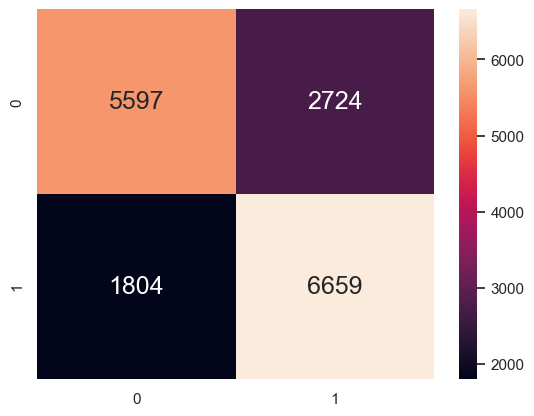

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix for Train and Test
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

#A function to find the True Positive Rate, False Positive Rate
#TPR = TP/(TP+FN), FPR = FP/(FP+TN)
def classification_error(y_true,y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR

[TPR1_test, FPR1_test] = classification_error(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
FPR, TPR, thresholds = roc_curve(y_test, y_pred)
test_AUC = auc(FPR,TPR)
print()
print("Accuracy\t\t:",test_AUC)
print("Previous Accuracy\t: 0.6447018865482063")
print("Improvement in Accuracy\t:", test_AUC - 0.6447018865482063 )
print()


# Print Classification Accuracy, True Positive Rate, False Positive Rate 
# Check the Goodness of Fit 
print()
print("Goodness of Fit of Model: ")
print("True Positive Rate\t:", [TPR1_test, FPR1_test][0])
print("False Positive Rate\t:", [TPR1_test, FPR1_test][1])
print("------------------------------------------------------")

print("Previous Goodness of Fit of Model")
print("True Positive Rate\t: 0.6188112962306511")
print("False Positive Rate\t: 0.32940752313423866")
print("------------------------------------------------------")

print("Improvement on the TPR\t:", [TPR1_test, FPR1_test][0] - 0.6188112962306511)
print("Improvement on the FPR\t:", (0.32940752313423866 - [TPR1_test, FPR1_test][1]))
print()

### 5.8 Visualising Optimised Decision Trees

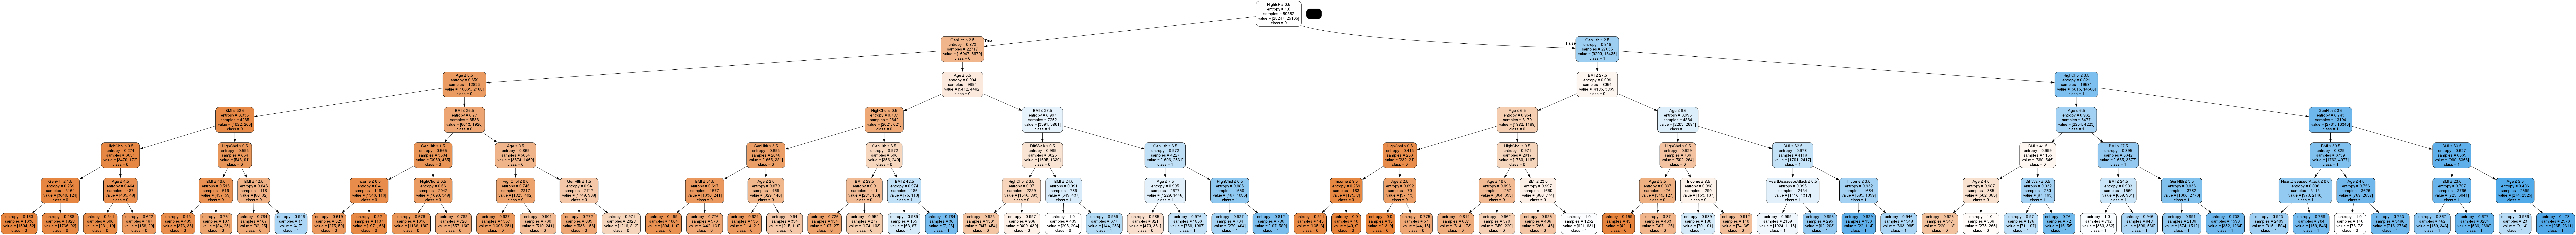

In [12]:
!pip install pydotplus

from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = featured_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())